# SVM for handwritten digit classificatin

## 1. Basic training procedure

In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import gzip, os
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

The directory containing this notebook should also contain two-dimensional data files, `data1.txt` through `data5.txt`. These files contain one data point per line, along with a label (either -1 or 1), like:
* `3 8 -1` (meaning that point `x=(3,8)` has label `y=-1`)

The next procedure, **learn_and_display_SVM**, loads one of these data sets, invokes `sklearn.SVC` to learn a classifier, and then displays the data as well as the boundary. It is invoked as follows:
* `learn_and_display_SVM(datafile, kernel_type, C_value, s_value)`

where
* `datafile` is one of `'data1.txt'` through `'data5.txt'` (or another file in the same format)
* `kernel_type` is either `'quadratic'` or `'rbf'`
* `C_value` is the setting of the soft-margin parameter `C` (default: 1.0)
* `s_value` (for the RBF kernel) is the scaling parameter `s` (default: 1.0)

In [4]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

Now load in the training set and test set

In [5]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

The function **displaychar** shows a single MNIST digit. To do this, it first has to reshape the 784-dimensional vector into a 28x28 image.

In [6]:
def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

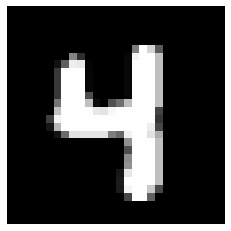

In [7]:
displaychar(train_data[58])

In [8]:
train_data.shape, train_labels.shape

((60000, 784), (60000,))

In [9]:
test_data.shape, test_labels.shape

((10000, 784), (10000,))

Learn a linear SVM classifier using  sklearn.svm.LinearSVC , setting  loss=′hinge′ . 

Try different values  C=0.01,0.1,1.0,10.0,100.0 . Find the training error and test error in each case.

Then try kernel SVM with a quadratic kernel. For this you can use  sklearn.svm.SVC , setting  kernel=′poly′  and  degree=2 . 

Just try the setting  C=1.0 .

In [10]:
from sklearn.svm import LinearSVC

In [16]:
def fit_linear_classifier(C_value=1.0, max_iter=1000):
    clf = LinearSVC(C=C_value, loss='hinge')
    clf.fit(train_data,train_labels)
    ## Get predictions on train data
    train_preds = clf.predict(train_data)
    train_error = float(np.sum((train_preds > 0.0) != (train_labels > 0.0)))/len(train_labels)
    ## Get predictions on test data
    test_preds = clf.predict(test_data)
    test_error = float(np.sum((test_preds > 0.0) != (test_labels > 0.0)))/len(test_labels)
    ##
    return train_error, test_error

In [17]:
c_vals = np.geomspace(1e-2, 1e2, 5)

for c in c_vals:
    train_error, test_error = fit_linear_classifier(C_value=c)
    print ("Error rate for C = %0.2f: train%0.3f, test %0.3f" % (c, train_error, test_error))

C:\Users\djord\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Error rate for C = 0.01: train0.008, test 0.009


C:\Users\djord\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Error rate for C = 0.10: train0.010, test 0.012


C:\Users\djord\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Error rate for C = 1.00: train0.009, test 0.009


C:\Users\djord\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Error rate for C = 10.00: train0.013, test 0.015


C:\Users\djord\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Error rate for C = 100.00: train0.007, test 0.009


In [13]:
from sklearn.svm import SVC

In [14]:
def fit_quadratic_classifier(c_value=1.0):
    clf = SVC(C=c_value, kernel='poly', degree=2)
    clf.fit(train_data,train_labels)
    #Get predictions on train data
    train_preds = clf.predict(train_data)
    train_error = float(np.sum((train_preds > 0.0) != (train_labels > 0.0)))/len(train_labels)
    #Get predictions on test data
    test_preds = clf.predict(test_data)
    test_error = float(np.sum((test_preds > 0.0) != (test_labels > 0.0)))/len(test_labels)
    
    return train_error, test_error    

In [15]:
train_error, test_error = fit_quadratic_classifier(1.0)
print("Error rate for C = %0.2f: train %0.3f, test %0.3f" % (1.0, train_error, test_error))

C:\Users\djord\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Error rate for C = 1.00: train 0.000, test 0.003
